# Attributing labels to a dataset using clustering based methods

# Loading dataset

First of all we load mnist and fashion mnist dataset from tensorflow keras API as wanted

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist, fashion_mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

(x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = fashion_mnist.load_data()

print("MNIST train shape:", x_train_mnist.shape)
print("MNIST test shape:", x_test_mnist.shape)
print("Fashion MNIST train shape:", x_train_fashion.shape)
print("Fashion MNIST test shape:", x_test_fashion.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
MNIST train shape: (60000, 28, 28)
MNIST test shape: (10000, 28, 28)
Fashion MNIST train shape: (60000, 28, 28)
Fashion MNIST test shape: (10000, 28, 28)


Displaying a sample image from each dataset


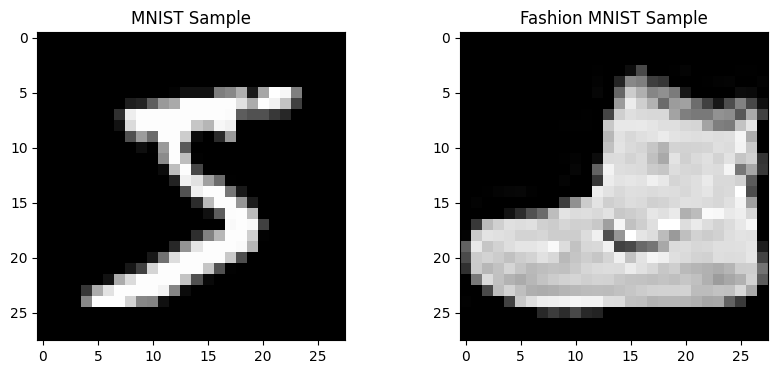

In [5]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(x_train_mnist[0], cmap='gray')
plt.title("MNIST Sample")

plt.subplot(1, 2, 2)
plt.imshow(x_train_fashion[0], cmap='gray')
plt.title("Fashion MNIST Sample")

plt.show()

Then we normalize all datasets sections and then we split each to train and validation

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

x_train_mnist_flat = x_train_mnist.reshape(-1, 28*28)
x_test_mnist_flat = x_test_mnist.reshape(-1, 28*28)
x_train_fashion_flat = x_train_fashion.reshape(-1, 28*28)
x_test_fashion_flat = x_test_fashion.reshape(-1, 28*28)

scaler = MinMaxScaler()
x_train_mnist_flat = scaler.fit_transform(x_train_mnist_flat)
x_test_mnist_flat = scaler.transform(x_test_mnist_flat)
x_train_fashion_flat = scaler.fit_transform(x_train_fashion_flat)
x_test_fashion_flat = scaler.transform(x_test_fashion_flat)

x_train_mnist = x_train_mnist_flat.reshape(-1, 28, 28, 1)
x_test_mnist = x_test_mnist_flat.reshape(-1, 28, 28, 1)
x_train_fashion = x_train_fashion_flat.reshape(-1, 28, 28, 1)
x_test_fashion = x_test_fashion_flat.reshape(-1, 28, 28, 1)

x_train_mnist, x_val_mnist, y_train_mnist, y_val_mnist = train_test_split(x_train_mnist, y_train_mnist, test_size=0.25, random_state=42)
x_train_fashion, x_val_fashion, y_train_fashion, y_val_fashion = train_test_split(x_train_fashion, y_train_fashion, test_size=0.25, random_state=42)

print("MNIST training set shape:", x_train_mnist.shape)
print("MNIST validation set shape:", x_val_mnist.shape)
print("MNIST test set shape:", x_test_mnist.shape)
print("Fashion MNIST training set shape:", x_train_fashion.shape)
print("Fashion MNIST validation set shape:", x_val_fashion.shape)
print("Fashion MNIST test set shape:", x_test_fashion.shape)


MNIST training set shape: (45000, 28, 28, 1)
MNIST validation set shape: (15000, 28, 28, 1)
MNIST test set shape: (10000, 28, 28, 1)
Fashion MNIST training set shape: (45000, 28, 28, 1)
Fashion MNIST validation set shape: (15000, 28, 28, 1)
Fashion MNIST test set shape: (10000, 28, 28, 1)


Here we implement the convolutional autoencoder in Keras Functional

In [7]:
import tensorflow as tf
import keras
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  2


In [9]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import layers

from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import Reshape, Conv2DTranspose,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
inputs = Input(shape=(28, 28, 1), name='encoder_input')
x = inputs
x = Conv2D(filters=128,kernel_size=7, activation='relu', strides=1, padding='same')(x)
x = layers.MaxPooling2D(2, 2)(x)

x = Conv2D(filters=128,kernel_size=7, activation='relu', strides=1, padding='same')(x)
x = layers.MaxPooling2D(2, 2)(x)

shape = K.int_shape(x)

x = Flatten()(x)
l = Dense(10, name='latent_vector')(x)
encoder = Model(inputs, l, name='encoder')
encoder.summary()

In [ ]:
latent_inputs = Input(shape=(10,), name='decoder_input')
x = Dense(shape[1] * shape[2] * shape[3])(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)
x = layers.UpSampling2D(size=(2, 2))(x)
x = Conv2DTranspose(filters=128, kernel_size=7,activation='relu',strides=1,  padding='same')(x)
x = layers.UpSampling2D(size=(2, 2))(x)

outputs = Conv2DTranspose(filters=1,kernel_size=7,activation='sigmoid', padding='same', name='decoder_output')(x)

In [ ]:
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

In [ ]:

autoencoder = Model(inputs,decoder(encoder(inputs)),name='autoencoder')
autoencoder.summary()

Model: "autoencoder"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 encoder_input (InputLayer)  [(None, 28, 28, 1)]       0         

                                                                 

 encoder (Functional)        (None, 10)                872074    

                                                                 

 decoder (Functional)        (None, 28, 28, 1)         878209    

                                                                 


Total params: 1750283 (6.68 MB)

Trainable params: 1750283 (6.68 MB)

Non-trainable params: 0 (0.00 Byte)

_________________________________________________________________


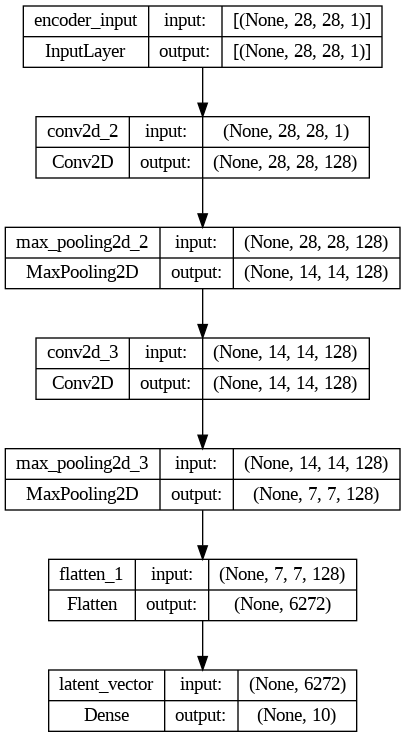

In [ ]:
plot_model(encoder,to_file='encoder.png',show_shapes=True)

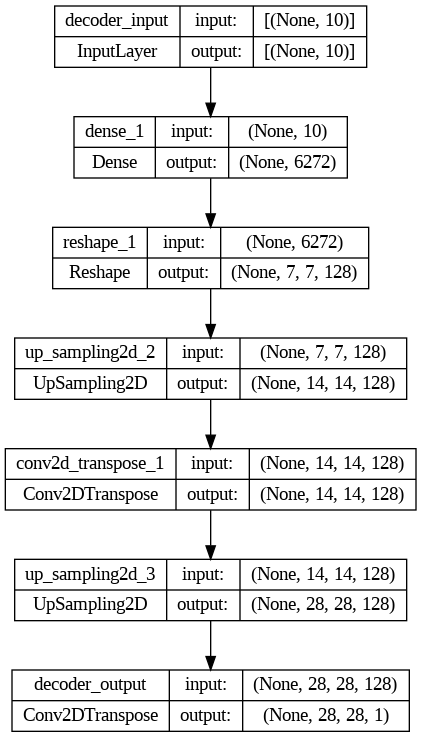

In [ ]:
plot_model(decoder, to_file='decoder.png', show_shapes=True)

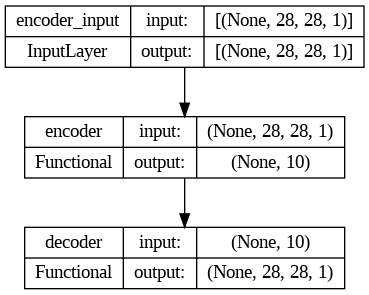

In [ ]:
plot_model(autoencoder,to_file='autoencoder.png',show_shapes=True)

In [ ]:

from keras.callbacks import TensorBoard
logdir = "/tmp/autoencoder"
tensorboard_callback = TensorBoard(log_dir=logdir)

In [ ]:

optimizer=keras.optimizers.Adam(learning_rate=0.001)

autoencoder.compile(optimizer=optimizer, loss='mse', metrics=['mean_absolute_error','mean_squared_error'])
history=autoencoder.fit(x_train_mnist, x_train_mnist,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_val_mnist, x_val_mnist))

Epoch 1/10

176/176 [==============================] - 16s 74ms/step - loss: 0.0439 - mean_absolute_error: 0.0991 - mean_squared_error: 0.0439 - val_loss: 0.0213 - val_mean_absolute_error: 0.0570 - val_mean_squared_error: 0.0213

Epoch 2/10

176/176 [==============================] - 13s 72ms/step - loss: 0.0184 - mean_absolute_error: 0.0511 - mean_squared_error: 0.0184 - val_loss: 0.0168 - val_mean_absolute_error: 0.0475 - val_mean_squared_error: 0.0168

Epoch 3/10

176/176 [==============================] - 14s 80ms/step - loss: 0.0156 - mean_absolute_error: 0.0456 - mean_squared_error: 0.0156 - val_loss: 0.0149 - val_mean_absolute_error: 0.0439 - val_mean_squared_error: 0.0149

Epoch 4/10

176/176 [==============================] - 13s 74ms/step - loss: 0.0143 - mean_absolute_error: 0.0429 - mean_squared_error: 0.0143 - val_loss: 0.0140 - val_mean_absolute_error: 0.0420 - val_mean_squared_error: 0.0140

Epoch 5/10

176/176 [==============================] - 14s 81ms/step - loss: 0.0

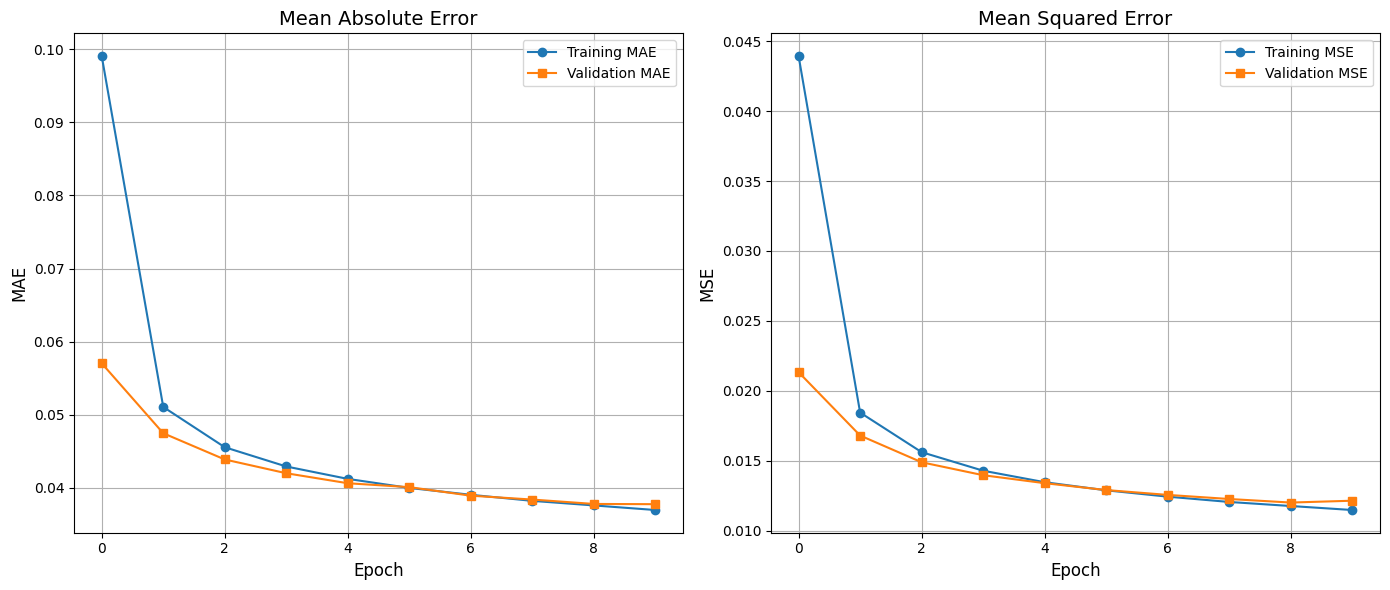

In [ ]:
import keras
from keras import layers
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
plt.plot(history.history['mean_absolute_error'], label='Training MAE', marker='o')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE', marker='s')
plt.title('Mean Absolute Error', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['mean_squared_error'], label='Training MSE', marker='o')
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE', marker='s')
plt.title('Mean Squared Error', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
test_loss, test_mae, test_mse = autoencoder.evaluate(x_test_mnist, x_test_mnist, verbose=2)
print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')

313/313 - 2s - loss: 0.0121 - mean_absolute_error: 0.0374 - mean_squared_error: 0.0121 - 2s/epoch - 7ms/step

Test MAE: 0.037433139979839325

Test MSE: 0.01211218349635601


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


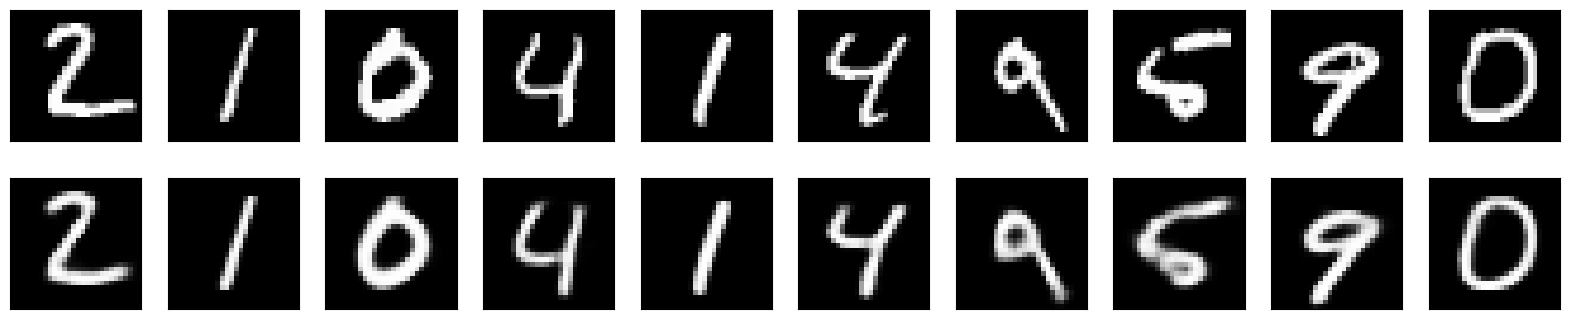

In [ ]:
decoded_imgs = autoencoder.predict(x_test_mnist)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_mnist[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


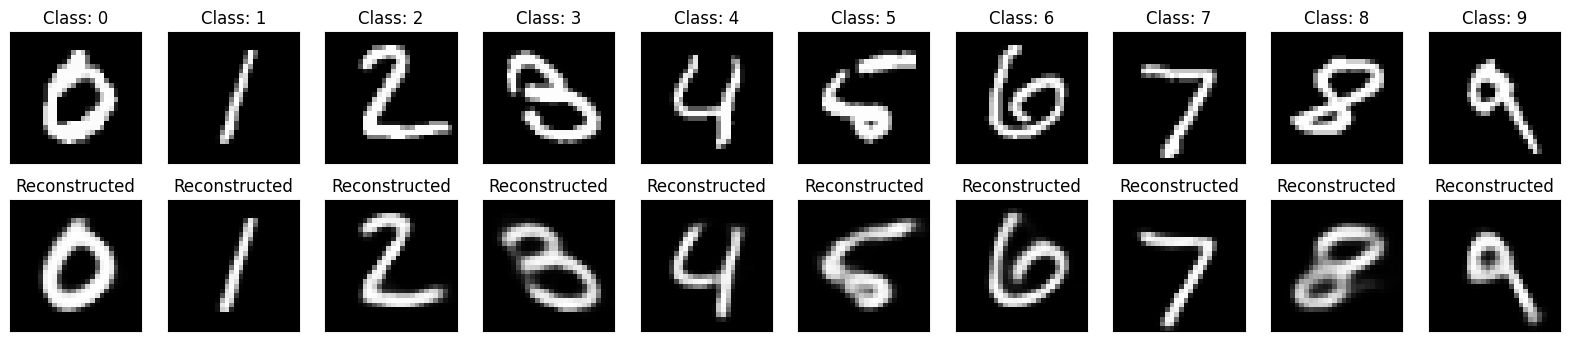

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


(y_train, _), (x_test_mnist, y_test_mnist) = mnist.load_data()
x_test_mnist = x_test_mnist.astype('float32') / 255.
x_test_mnist = np.reshape(x_test_mnist, (len(x_test_mnist), 28, 28, 1))

decoded_imgs = autoencoder.predict(x_test_mnist)

mnist_class_names = [str(i) for i in range(10)]

n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    idx = np.where(y_test_mnist == i)[0][0]

    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_mnist[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Class: {mnist_class_names[i]}")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[idx].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


In [ ]:

features_train_mnist = encoder.predict(x_train_mnist)
features_val_mnist = encoder.predict(x_val_mnist)
features_test_mnist = encoder.predict(x_test_mnist)


labels_train_mnist = y_train_mnist.reshape(-1)
labels_val_mnist = y_val_mnist.reshape(-1)
labels_test_mnist = y_test_mnist.reshape(-1)

features_mnist = np.concatenate((features_train_mnist, features_val_mnist, features_test_mnist), axis=0)
labels_mnist = np.concatenate((labels_train_mnist, labels_val_mnist, labels_test_mnist), axis=0)

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
features_mnist

array([[ 1.8474239 ,  0.18854074, -0.85341394, ...,  1.2122937 ,
        -0.9634907 ,  1.3358567 ],
       [ 1.9519668 , -0.40494332, -2.3150852 , ...,  1.3442427 ,
         2.358484  ,  0.42737693],
       [ 0.5308729 ,  0.66191125, -2.1953187 , ...,  1.3156295 ,
         3.0680802 ,  0.9654909 ],
       ...,
       [ 0.9275499 ,  0.84384495, -3.5074255 , ...,  0.09610163,
         1.0982747 , -0.8207687 ],
       [ 2.0051754 , -0.5700101 , -0.63294095, ...,  0.9361949 ,
         1.4565995 , -0.72014326],
       [-0.04096768,  2.4568431 , -1.3002573 , ...,  1.5193541 ,
         0.3470403 ,  0.9457752 ]], dtype=float32)

In [ ]:
features_mnist.shape

(70000, 10)

In [ ]:
labels_mnist ,labels_mnist.shape

(array([0, 1, 1, ..., 4, 5, 6], dtype=uint8), (70000,))

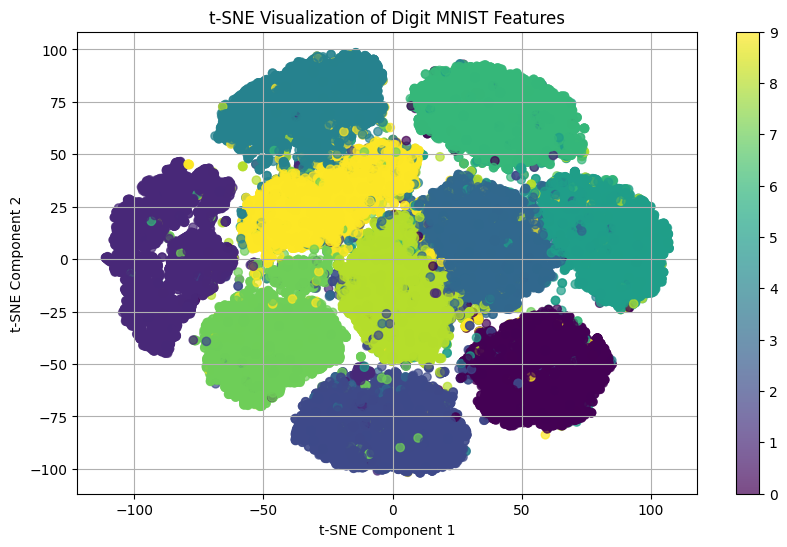

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
features_2d = tsne.fit_transform(features_mnist)

plt.figure(figsize=(10, 6))
plt.scatter(features_2d[:, 0], features_2d[:, 1], alpha=0.7, c=labels_mnist, cmap='viridis')  # Assuming you have labels_fashion for color-coding
plt.colorbar()
plt.title('t-SNE Visualization of Digit MNIST Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

import warnings



def find_best_k(features, k_range):
    silhouette_scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(features)
        silhouette_avg = silhouette_score(features, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    best_k = k_range[np.argmax(silhouette_scores)]
    return best_k, silhouette_scores

k_range = range(5, 16)
best_k_mnist, silhouette_scores_mnist = find_best_k(features_2d, k_range)
print(f"Best k for MNIST: {best_k_mnist}")


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

Best k for MNIST: 10


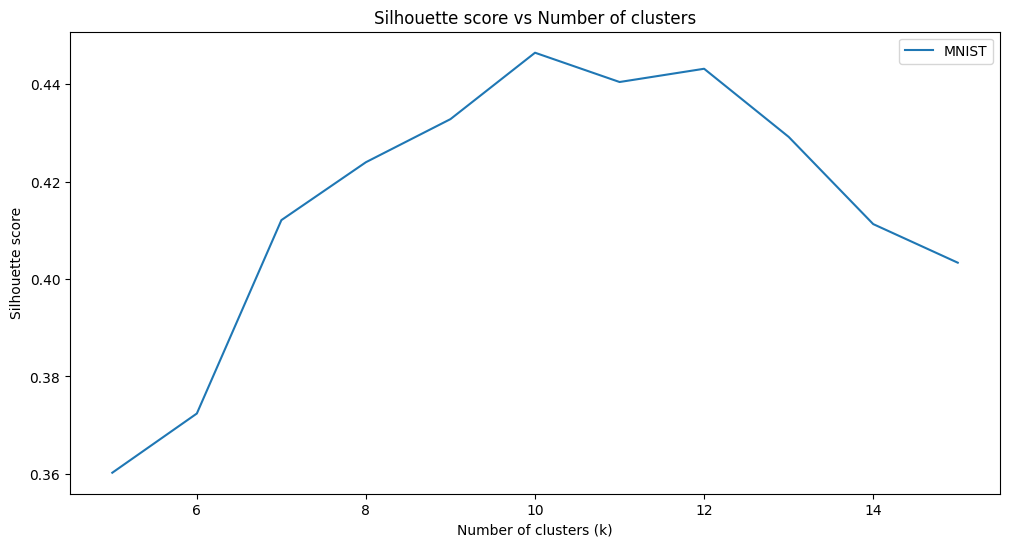

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(k_range, silhouette_scores_mnist, label='MNIST')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs Number of clusters')
plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 1200x800 with 0 Axes>

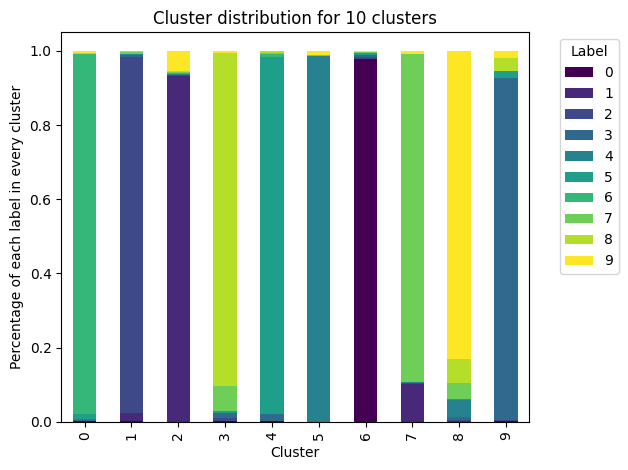

In [ ]:
import pandas as pd
import seaborn as sns

def plot_cluster_distribution(features, labels, best_k):
    kmeans = KMeans(n_clusters=best_k, random_state=42)
    cluster_labels = kmeans.fit_predict(features)

    df = pd.DataFrame({'Cluster': cluster_labels, 'Label': labels})
    cluster_counts = df.groupby(['Cluster', 'Label']).size().unstack(fill_value=0)

    cluster_counts_percentage = cluster_counts.div(cluster_counts.sum(axis=1), axis=0)

    plt.figure(figsize=(12, 8))
    cluster_counts_percentage.plot(kind='bar', stacked=True, colormap='viridis')
    plt.xlabel('Cluster')
    plt.ylabel('Percentage of each label in every cluster')
    plt.title(f'Cluster distribution for {best_k} clusters')
    plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    return df

mnist_cluster_df = plot_cluster_distribution(features_2d, labels_mnist, best_k_mnist)




/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

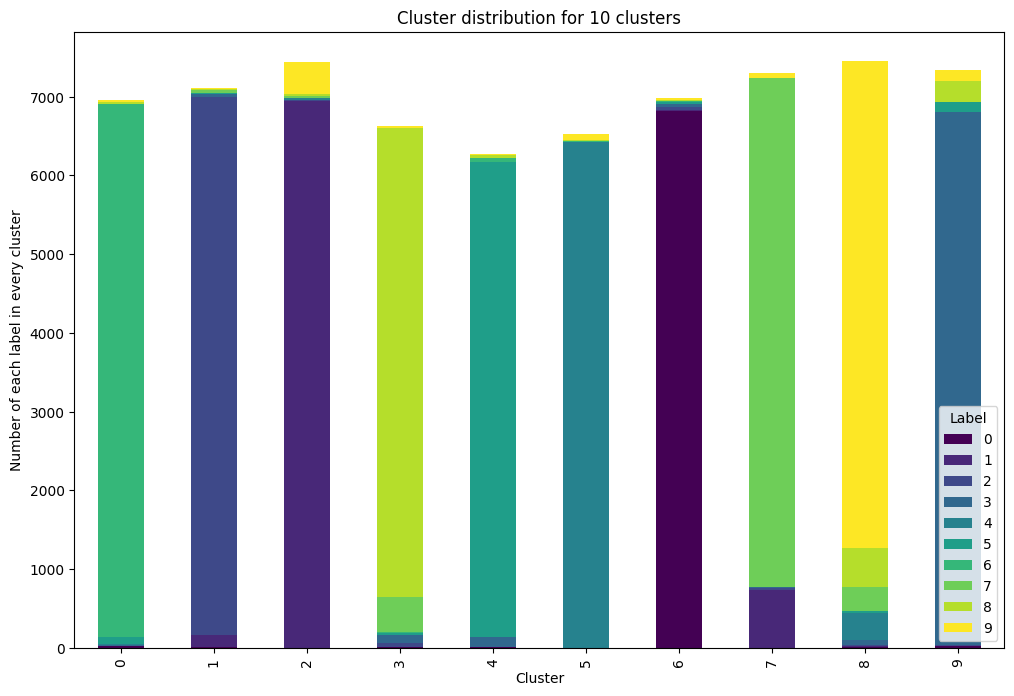

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def plot_cluster_distribution(features, labels, best_k):
    kmeans = KMeans(n_clusters=best_k, random_state=42)
    cluster_labels = kmeans.fit_predict(features)

    df = pd.DataFrame({'Cluster': cluster_labels, 'Label': labels})
    cluster_counts = df.groupby(['Cluster', 'Label']).size().unstack(fill_value=0)

    cluster_counts_percentage = cluster_counts.div(cluster_counts.sum(axis=1), axis=0)

    plt.figure(figsize=(12, 6))
    cluster_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))
    plt.xlabel('Cluster')
    plt.ylabel('Number of each label in every cluster')
    plt.title(f'Cluster distribution for {best_k} clusters')
    plt.legend(title='Label')
    plt.show()
    return df


mnist_cluster_df = plot_cluster_distribution(features_2d, labels_mnist, best_k_mnist)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

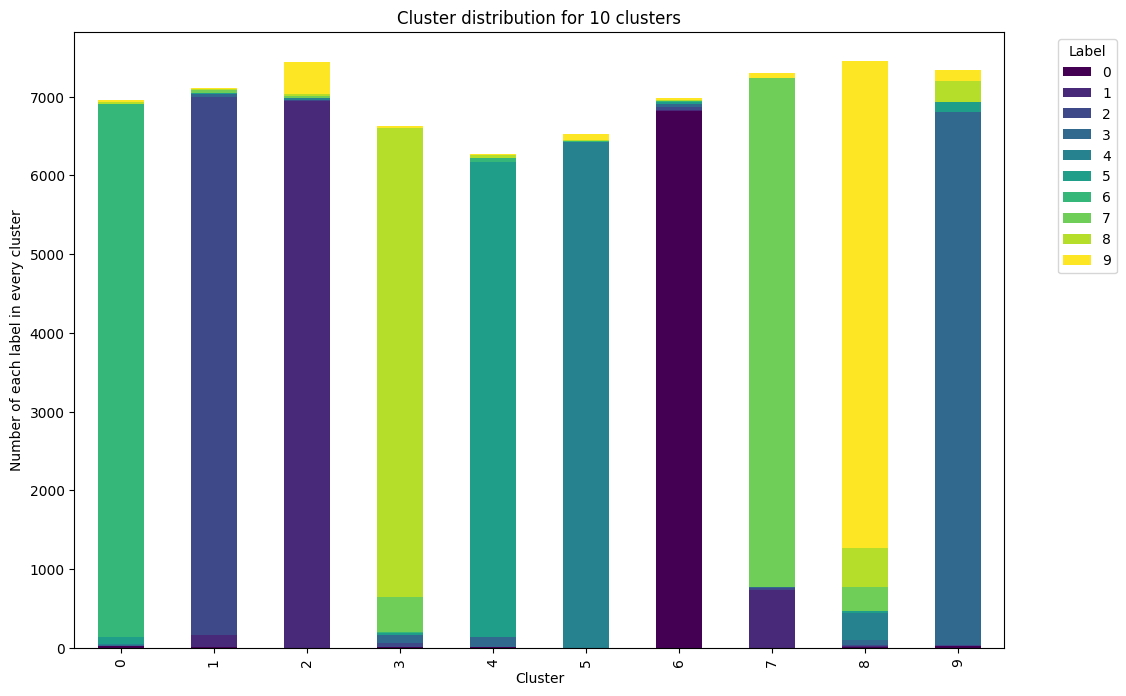

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Function to plot cluster distribution
def plot_cluster_distribution(features, labels, best_k):
    kmeans = KMeans(n_clusters=best_k, random_state=42)
    cluster_labels = kmeans.fit_predict(features)

    df = pd.DataFrame({'Cluster': cluster_labels, 'Label': labels})
    cluster_counts = df.groupby(['Cluster', 'Label']).size().unstack(fill_value=0)

    cluster_counts_percentage = cluster_counts.div(cluster_counts.sum(axis=1), axis=0)

    plt.figure(figsize=(12, 6))
    ax = cluster_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Number of each label in every cluster')
    ax.set_title(f'Cluster distribution for {best_k} clusters')
    plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    return df

best_k_mnist = 10  
mnist_cluster_df = plot_cluster_distribution(features_2d, labels_mnist, best_k_mnist)


let's assign the most frequent label in each cluster to that cluster and then create a confusion matrix based on these assignments. Here's the updated code:

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


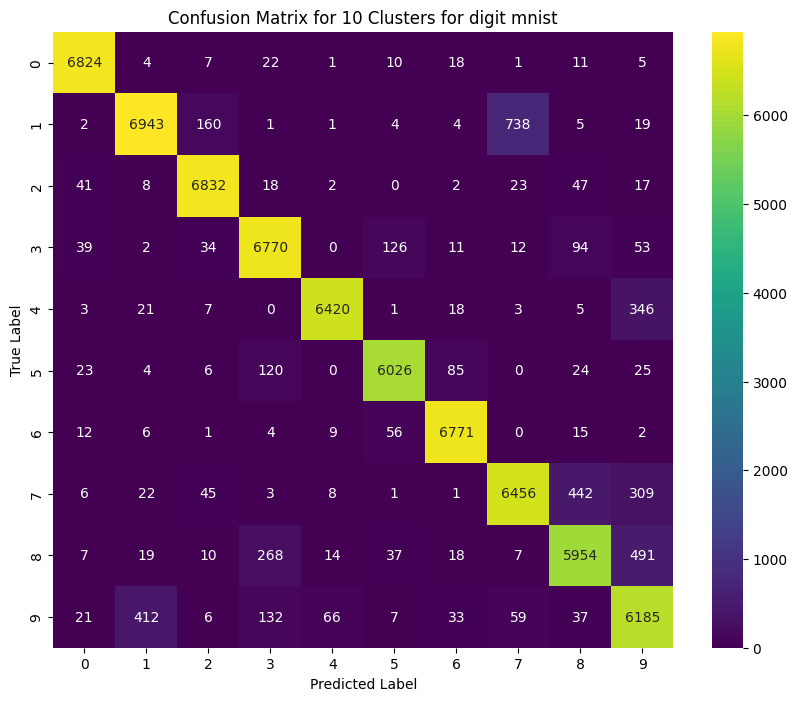

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(features, labels, best_k):
    kmeans = KMeans(n_clusters=best_k, random_state=42)
    cluster_labels = kmeans.fit_predict(features)

    df = pd.DataFrame({'Cluster': cluster_labels, 'Label': labels})

    cluster_to_label = df.groupby('Cluster')['Label'].agg(lambda x: x.value_counts().idxmax()).to_dict()

    predicted_labels = df['Cluster'].map(cluster_to_label)

    cm = confusion_matrix(labels, predicted_labels)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=range(best_k), yticklabels=range(10))
    plt.title(f'Confusion Matrix for {best_k} Clusters for digit mnist')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

best_k_mnist = 10  
plot_confusion_matrix(features_2d, labels_mnist, best_k_mnist)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


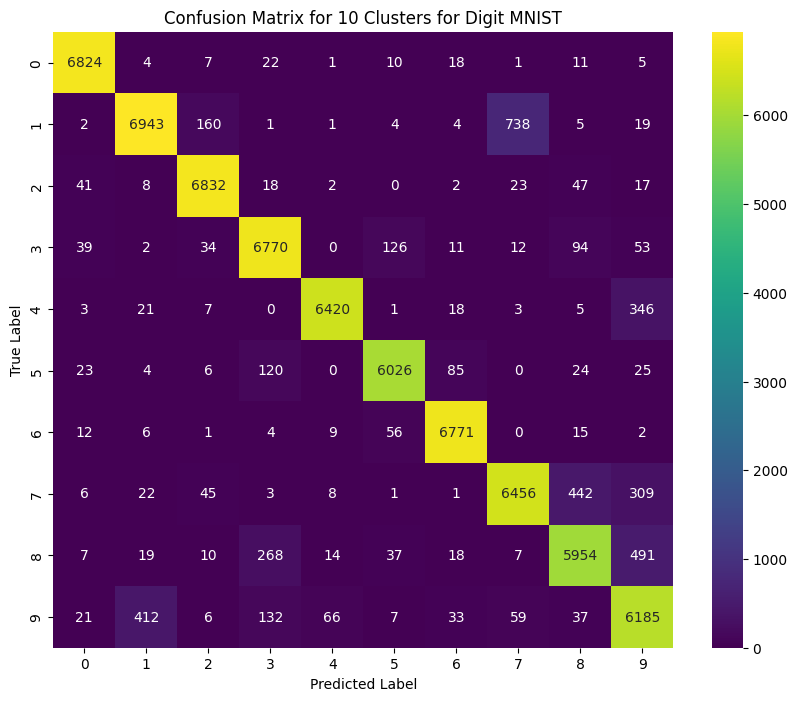

Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93

Classification Report:

              precision    recall  f1-score   support

     Class 0       0.98      0.99      0.98      6903
     Class 1       0.93      0.88      0.91      7877
     Class 2       0.96      0.98      0.97      6990
     Class 3       0.92      0.95      0.94      7141
     Class 4       0.98      0.94      0.96      6824
     Class 5       0.96      0.95      0.96      6313
     Class 6       0.97      0.98      0.98      6876
     Class 7       0.88      0.89      0.88      7293
     Class 8       0.90      0.87      0.88      6825
     Class 9       0.83      0.89      0.86      6958

    accuracy                           0.93     70000
   macro avg       0.93      0.93      0.93     70000
weighted avg       0.93      0.93      0.93     70000



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

def plot_confusion_matrix_and_metrics(features, labels, best_k):
    kmeans = KMeans(n_clusters=best_k, random_state=42)
    cluster_labels = kmeans.fit_predict(features)

    df = pd.DataFrame({'Cluster': cluster_labels, 'Label': labels})

    cluster_to_label = df.groupby('Cluster')['Label'].agg(lambda x: x.value_counts().idxmax()).to_dict()

    predicted_labels = df['Cluster'].map(cluster_to_label)

    accuracy = accuracy_score(labels, predicted_labels)
    precision = precision_score(labels, predicted_labels, average='macro')
    recall = recall_score(labels, predicted_labels, average='macro')
    f1 = f1_score(labels, predicted_labels, average='macro')

    report = classification_report(labels, predicted_labels, target_names=[f'Class {i}' for i in range(10)])

    cm = confusion_matrix(labels, predicted_labels)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=range(10), yticklabels=range(10))
    plt.title(f'Confusion Matrix for {best_k} Clusters for Digit MNIST')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print('\nClassification Report:\n')
    print(report)

best_k_mnist = 10  
plot_confusion_matrix_and_metrics(features_2d, labels_mnist, best_k_mnist)


## Here we repeat our algorithm for fashion mnist

In [10]:
inputs = Input(shape=(28, 28, 1), name='encoder_input')
x = inputs
x = Conv2D(filters=128,kernel_size=7, activation='relu', strides=1, padding='same')(x)
x = layers.MaxPooling2D(2, 2)(x)

x = Conv2D(filters=128,kernel_size=7, activation='relu', strides=1, padding='same')(x)
x = layers.MaxPooling2D(2, 2)(x)

shape = K.int_shape(x)

x = Flatten()(x)
l = Dense(10, name='latent_vector')(x)
encoder = Model(inputs, l, name='encoder')
encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 128)    │         6,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 128)    │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_vector (Dense)           │ (None, 10)             │        62,730 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 872,074 (3.33 MB)

 Trainable params: 872,074 (3.33 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
latent_inputs = Input(shape=(10,), name='decoder_input')
x = Dense(shape[1] * shape[2] * shape[3])(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)
x = layers.UpSampling2D(size=(2, 2))(x)
x = Conv2DTranspose(filters=128, kernel_size=7,activation='relu',strides=1,  padding='same')(x)
x = layers.UpSampling2D(size=(2, 2))(x)

outputs = Conv2DTranspose(filters=1,kernel_size=7,activation='sigmoid', padding='same', name='decoder_output')(x)
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6272)           │        68,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 128)    │       802,944 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_output                  │ (None, 28, 28, 1)      │         6,273 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 878,209 (3.35 MB)

 Trainable params: 878,209 (3.35 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:

autoencoder_f = Model(inputs,decoder(encoder(inputs)), name='autoencoder')
autoencoder_f.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 10)             │       872,074 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 28, 28, 1)      │       878,209 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,750,283 (6.68 MB)

 Trainable params: 1,750,283 (6.68 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
import tensorflow as tf
import keras
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  2


In [14]:

optimizer=keras.optimizers.Adam(learning_rate=0.001)

autoencoder_f.compile(optimizer=optimizer, loss='mse', metrics=['mean_absolute_error','mean_squared_error'])
history2=autoencoder_f.fit(x_train_fashion, x_train_fashion,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_val_fashion, x_val_fashion))

Epoch 1/10
  3/176 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 0.1597 - mean_absolute_error: 0.3660 - mean_squared_error: 0.1597

I0000 00:00:1719674847.710409      88 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1719674847.729804      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1719674847.731524      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.0552 - mean_absolute_error: 0.1545 - mean_squared_error: 0.0552

W0000 00:00:1719674866.394707      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1719674867.466264      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


176/176 ━━━━━━━━━━━━━━━━━━━━ 39s 138ms/step - loss: 0.0551 - mean_absolute_error: 0.1542 - mean_squared_error: 0.0551 - val_loss: 0.0186 - val_mean_absolute_error: 0.0734 - val_mean_squared_error: 0.0186
Epoch 2/10
  2/176 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 0.0185 - mean_absolute_error: 0.0736 - mean_squared_error: 0.0185

W0000 00:00:1719674871.855165      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - loss: 0.0178 - mean_absolute_error: 0.0713 - mean_squared_error: 0.0178 - val_loss: 0.0152 - val_mean_absolute_error: 0.0642 - val_mean_squared_error: 0.0152
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - loss: 0.0150 - mean_absolute_error: 0.0639 - mean_squared_error: 0.0150 - val_loss: 0.0139 - val_mean_absolute_error: 0.0608 - val_mean_squared_error: 0.0139
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - loss: 0.0137 - mean_absolute_error: 0.0603 - mean_squared_error: 0.0137 - val_loss: 0.0134 - val_mean_absolute_error: 0.0590 - val_mean_squared_error: 0.0134
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - loss: 0.0132 - mean_absolute_error: 0.0588 - mean_squared_error: 0.0132 - val_loss: 0.0131 - val_mean_absolute_error: 0.0583 - val_mean_squared_error: 0.0131
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - loss: 0.0128 - mean_absolute_error: 0.0577 - mean_squared_error: 0.0128 - val_loss: 0.0128 - val_me

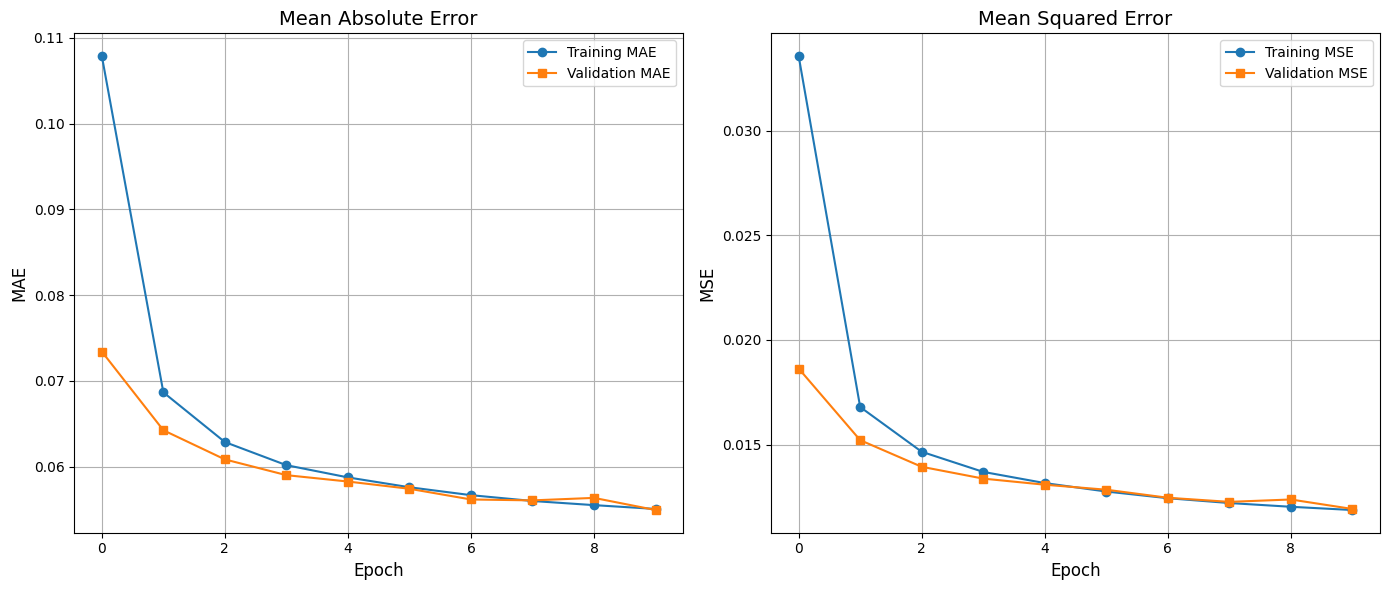

In [15]:
import keras
from keras import layers
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history2.history['mean_absolute_error'], label='Training MAE', marker='o')
plt.plot(history2.history['val_mean_absolute_error'], label='Validation MAE', marker='s')
plt.title('Mean Absolute Error', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history2.history['mean_squared_error'], label='Training MSE', marker='o')
plt.plot(history2.history['val_mean_squared_error'], label='Validation MSE', marker='s')
plt.title('Mean Squared Error', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


  47/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step

W0000 00:00:1719614361.757223      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


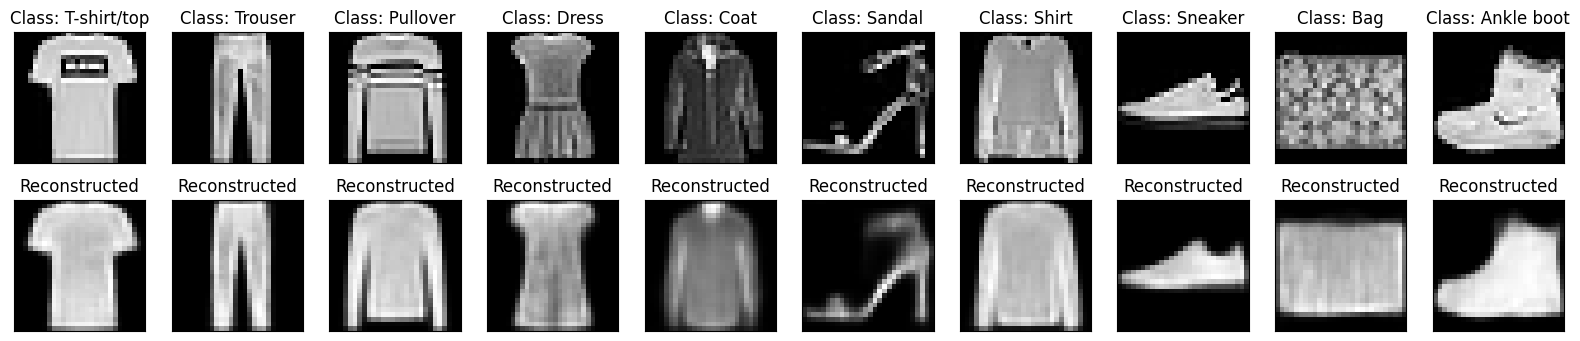

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist

(x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = fashion_mnist.load_data()
x_train_fashion = x_train_fashion.astype('float32') / 255.
x_test_fashion = x_test_fashion.astype('float32') / 255.
x_train_fashion = np.reshape(x_train_fashion, (len(x_train_fashion), 28, 28, 1))
x_test_fashion = np.reshape(x_test_fashion, (len(x_test_fashion), 28, 28, 1))

decoded_imgs = autoencoder_f.predict(x_train_fashion)

fashion_class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    idx = np.where(y_train_fashion == i)[0][0]

    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train_fashion[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Class: {fashion_class_names[i]}")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[idx].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


In [16]:
test_loss, test_mae, test_mse = autoencoder_f.evaluate(x_test_fashion, x_test_fashion, verbose=2)
print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')


W0000 00:00:1719674979.736377      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 - 4s - 12ms/step - loss: 0.0120 - mean_absolute_error: 0.0553 - mean_squared_error: 0.0120
Test MAE: 0.05526643246412277
Test MSE: 0.011975077912211418


In [17]:

features_train_fashion = encoder.predict(x_train_fashion)
features_val_fashion = encoder.predict(x_val_fashion)
features_test_fashion = encoder.predict(x_test_fashion)

labels_train_fashion = y_train_fashion.reshape(-1)
labels_val_fashion = y_val_fashion.reshape(-1)
labels_test_fashion = y_test_fashion.reshape(-1)

features_fashion = np.concatenate((features_train_fashion, features_val_fashion, features_test_fashion), axis=0)
labels_fashion = np.concatenate((labels_train_fashion, labels_val_fashion, labels_test_fashion), axis=0)

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [18]:
features_fashion.shape

(70000, 10)

In [19]:
labels_fashion ,labels_fashion.shape

(array([6, 8, 9, ..., 8, 1, 5], dtype=uint8), (70000,))

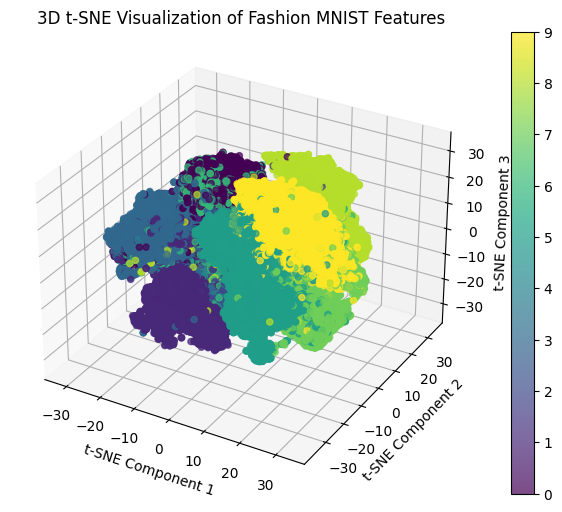

In [36]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


tsne = TSNE(n_components=3, random_state=10)
features_3d = tsne.fit_transform(features_fashion)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(features_3d[:, 0], features_3d[:, 1], features_3d[:, 2], alpha=0.7, c=labels_fashion, cmap='viridis')

plt.colorbar(sc)
ax.set_title('3D t-SNE Visualization of Fashion MNIST Features')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
plt.show()


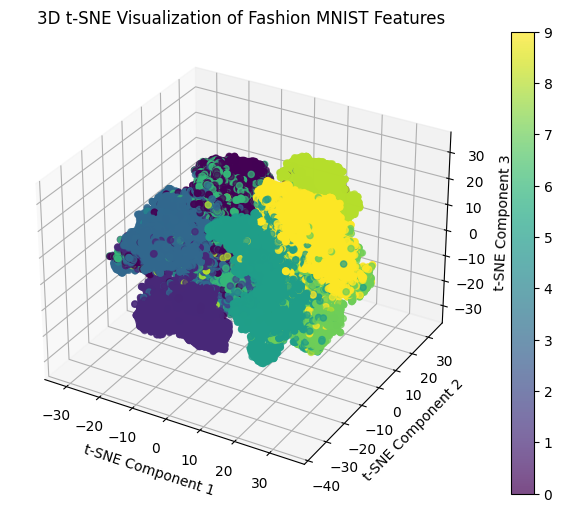

In [20]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


tsne = TSNE(n_components=3, random_state=42)
features_3d = tsne.fit_transform(features_fashion)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(features_3d[:, 0], features_3d[:, 1], features_3d[:, 2], alpha=0.7, c=labels_fashion, cmap='viridis')

plt.colorbar(sc)
ax.set_title('3D t-SNE Visualization of Fashion MNIST Features')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
plt.show()


In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

import warnings

def find_best_k(features, k_range):
    silhouette_scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=10)
        cluster_labels = kmeans.fit_predict(features)
        silhouette_avg = silhouette_score(features, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    best_k = k_range[np.argmax(silhouette_scores)]
    return best_k, silhouette_scores

k_range = range(5, 16)
best_k_fashion, silhouette_scores_fashion = find_best_k(features_3d, k_range)
print(f"Best k for fashion: {best_k_fashion}")


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

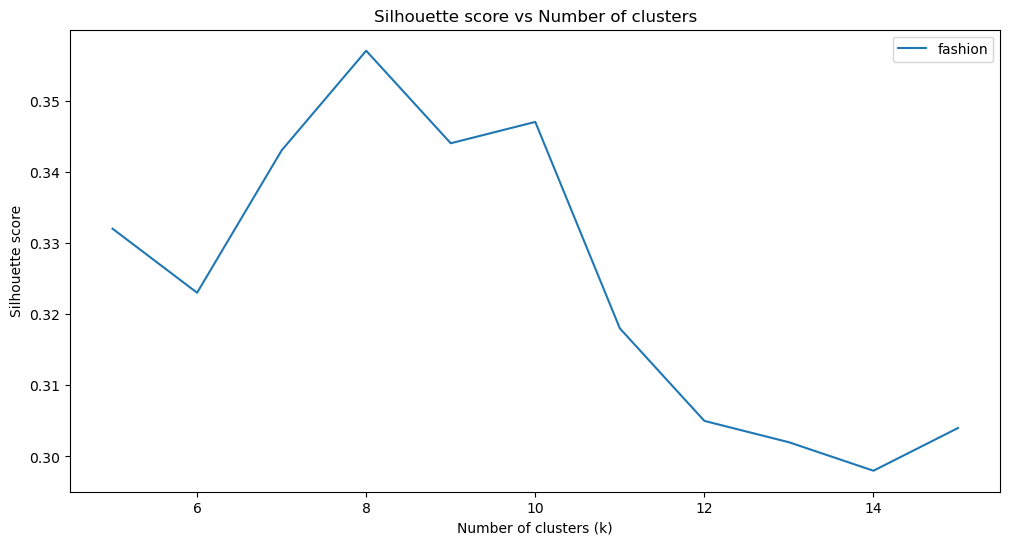

In [5]:

plt.figure(figsize=(12, 6))
plt.plot(k_range, silhouette_scores_fashion, label='fashion')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs Number of clusters')
plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

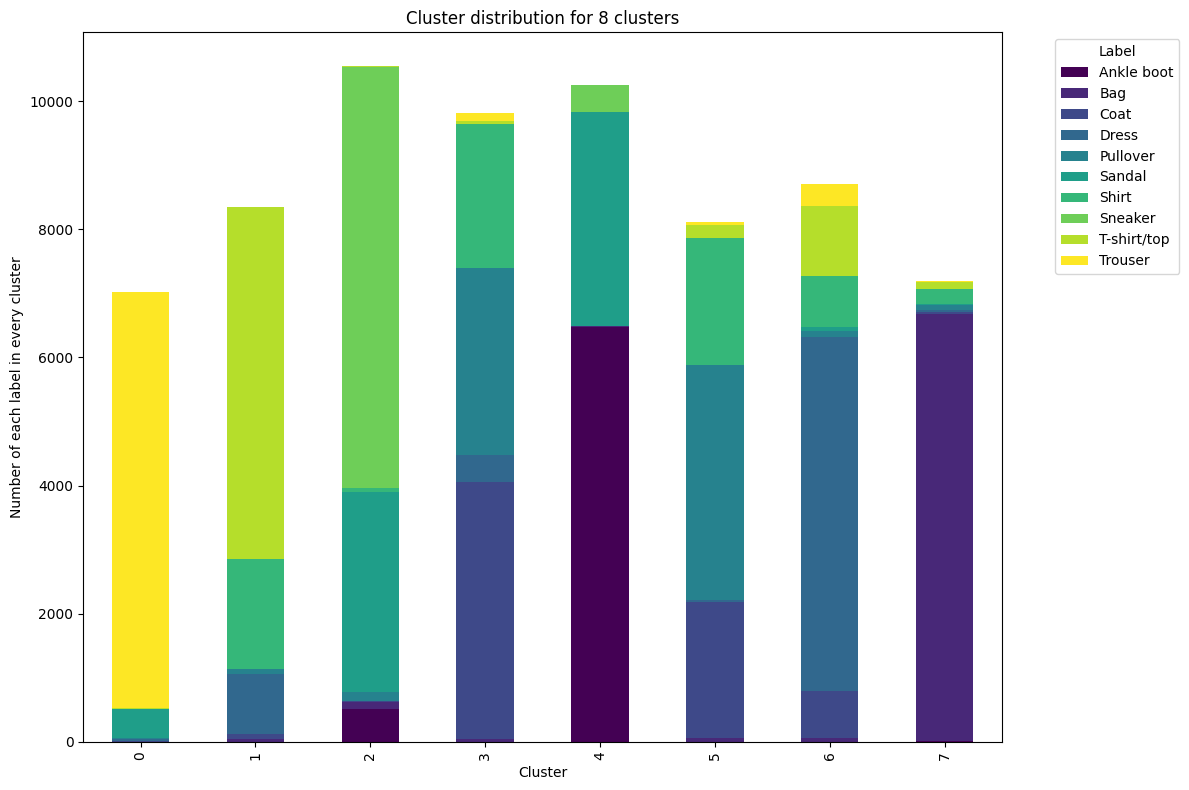

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

fashion_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_cluster_distribution(features, labels, best_k):
    kmeans = KMeans(n_clusters=best_k, random_state=42)
    cluster_labels = kmeans.fit_predict(features)

    df = pd.DataFrame({'Cluster': cluster_labels, 'Label': labels})

    df['Label'] = df['Label'].map(lambda x: fashion_labels[x])

    cluster_counts = df.groupby(['Cluster', 'Label']).size().unstack(fill_value=0)

    cluster_counts_percentage = cluster_counts.div(cluster_counts.sum(axis=1), axis=0)

    plt.figure(figsize=(12, 6))
    cluster_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))
    plt.xlabel('Cluster')
    plt.ylabel('Number of each label in every cluster')
    plt.title(f'Cluster distribution for {best_k} clusters')
    plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    return df

fashion_cluster_df = plot_cluster_distribution(features_3d, labels_fashion, best_k_fashion)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 1200x800 with 0 Axes>

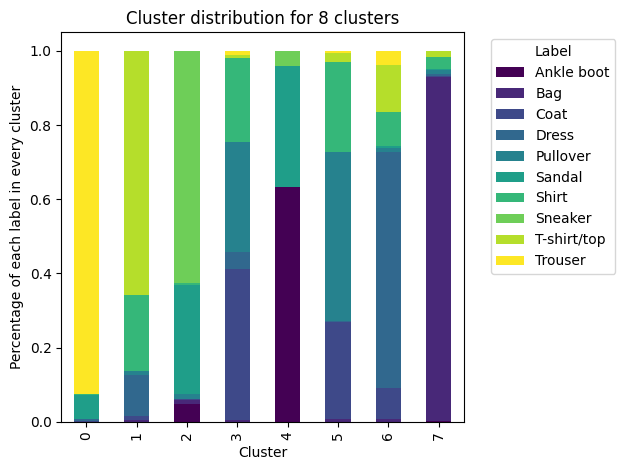

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

fashion_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_cluster_distribution(features, labels, best_k):
    kmeans = KMeans(n_clusters=best_k, random_state=42)
    cluster_labels = kmeans.fit_predict(features)

    df = pd.DataFrame({'Cluster': cluster_labels, 'Label': labels})

    df['Label'] = df['Label'].map(lambda x: fashion_labels[x])

    cluster_counts = df.groupby(['Cluster', 'Label']).size().unstack(fill_value=0)

    cluster_counts_percentage = cluster_counts.div(cluster_counts.sum(axis=1), axis=0)

    plt.figure(figsize=(12, 8))
    cluster_counts_percentage.plot(kind='bar', stacked=True, colormap='viridis')
    plt.xlabel('Cluster')
    plt.ylabel('Percentage of each label in every cluster')
    plt.title(f'Cluster distribution for {best_k} clusters')
    plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    return df

fashion_cluster_df = plot_cluster_distribution(features_3d, labels_fashion, best_k_fashion)


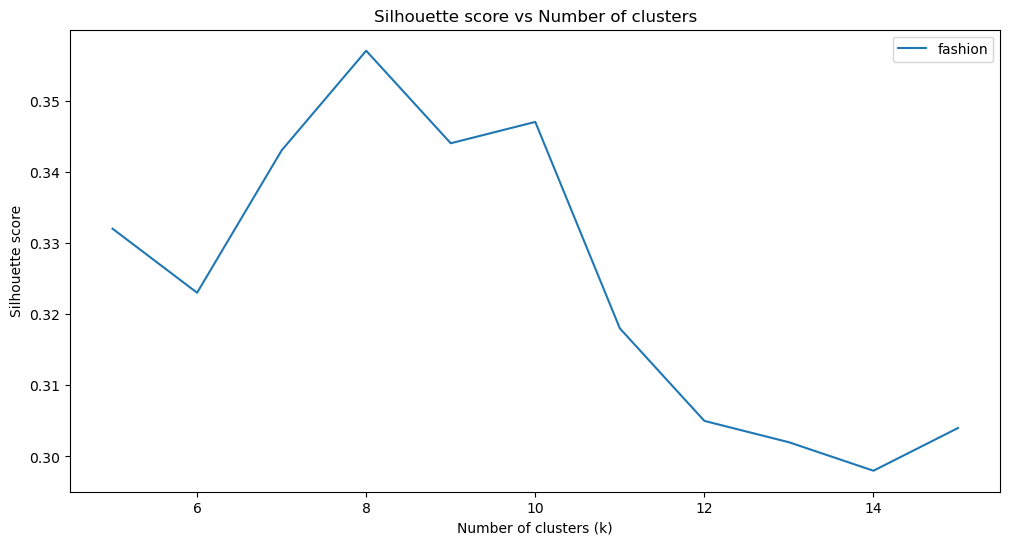

In [6]:

plt.figure(figsize=(12, 6))
plt.plot(k_range, silhouette_scores_fashion, label='fashion')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs Number of clusters')
plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


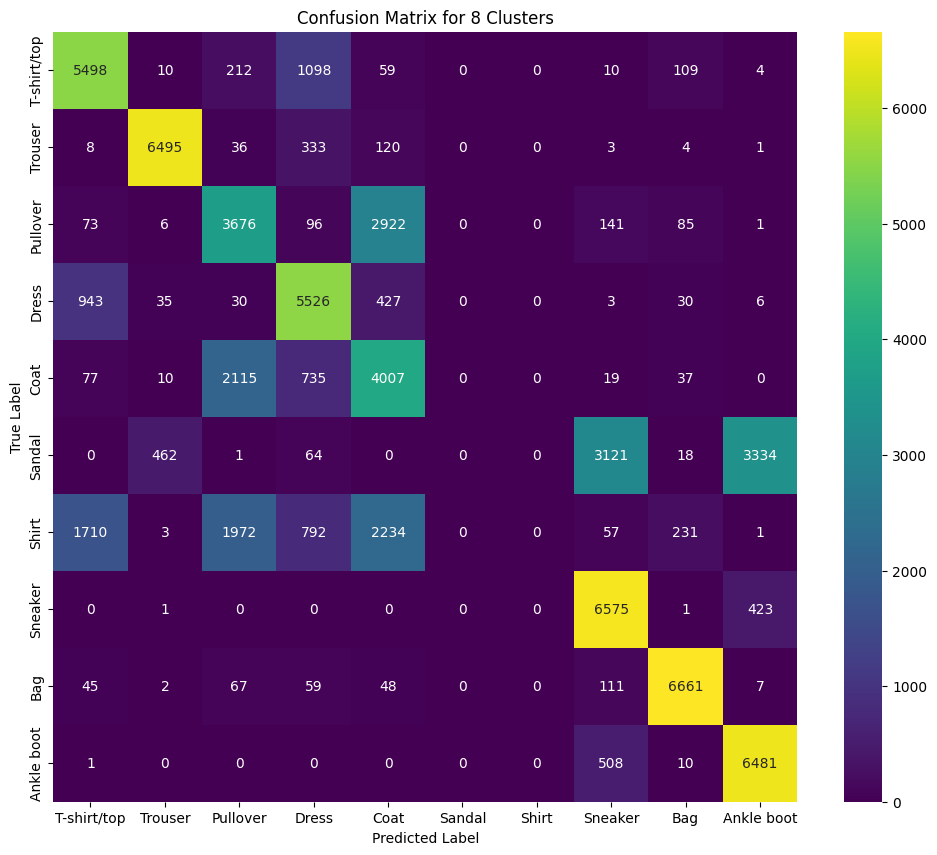

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fashion_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_confusion_matrix(features, labels, best_k):
    kmeans = KMeans(n_clusters=best_k, random_state=42)
    cluster_labels = kmeans.fit_predict(features)

    df = pd.DataFrame({'Cluster': cluster_labels, 'Label': labels})

    df['Label'] = df['Label'].map(lambda x: fashion_labels[x])

    cluster_counts = df.groupby(['Cluster', 'Label']).size().unstack(fill_value=0)

    cluster_counts_percentage = cluster_counts.div(cluster_counts.sum(axis=1), axis=0)

    cluster_to_label = cluster_counts.idxmax(axis=1).to_dict()

    predicted_labels = df['Cluster'].map(cluster_to_label)

    cm = confusion_matrix(df['Label'], predicted_labels, labels=fashion_labels)

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=fashion_labels, yticklabels=fashion_labels)
    plt.title(f'Confusion Matrix for {best_k} Clusters')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


plot_confusion_matrix(features_3d, labels_fashion, best_k_fashion)
